# Chapter 1: GARCH Model Fundamentals

GARCH: Generated AutoRegressive Conditional Heteroskedasticity

## What is volatility?
* Describes the dispersion of financial assets over time

* Often computed as the standard deviation or variance of price returns

* Higher volatility = Riskier stock

## How to compute volatility
Step 1: Calculate returns as percentage of price changes
Step 2: Calculate the sample mean return 
Step 3: Calculate the sample standard deviation

## Compute volatility in Python
Use pandas pct_change() method on price data

Use std() method on price data

## Volatility conversion
* Convert to monthly volatility from daily:
(assume 21 trading days in a month)
\begin{align*}
\sigma_{monthly} = \sqrt{21} * \sigma_d
\end{align*}
* Convert to annual volatility from daily:
(assume 252 trading days in a year)
\begin{align*}
\sigma_{annual} = \sqrt{252} * \sigma_d
\end{align*}

## The challenge of volatility modeling
Heteroskedasticity:
* In ancient Greek: different (hetero) + dispersion (skedasis)
* A time series demonstrates varying volatility systematically over time

## Detect Heteroskedasticity
Homoskedasticity vs. Heteroskedasticity
plot data and observe:
Heteroskedasticity data doesnt appear stable

Volatility clustering - series of high and low volatility exist. Large changes are likely to be followed by more large changes and vice versa. Volatility clustering happens usually from news.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('ggplot')

In [3]:
# Datasets used in this course
sp_price = pd.read_csv('datasets/SP500.csv')

In [4]:
# Calculate daily returns as percentage price changes
sp_price['Return'] = 100 * (sp_price['Close'].pct_change())
print(sp_price.tail())

Date    Close    Return
2331  2019/10/04  2952.01  1.421685
2332  2019/10/07  2938.79 -0.447830
2333  2019/10/08  2893.06 -1.556083
2334  2019/10/09  2919.40  0.910455
2335  2019/10/10  2938.13  0.641570


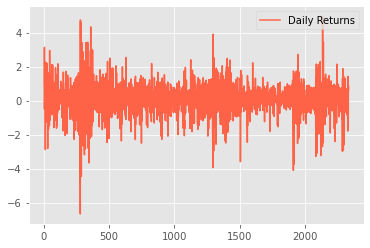

In [5]:
# Observer Returns Behavior over time (Volatility Clustering)
plt.plot(sp_price['Return'], color='tomato', label='Daily Returns')
plt.legend(loc='upper right')
plt.show()

In [11]:
# Calculate daily std of returns
std_daily = sp_price['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

# Convert daily volatility to monthly volatility
std_monthly = math.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
std_annual = math.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.2f}%'.format(std_annual))

Daily volatility:  0.92%
Monthly volatility:  4.20%
Annual volatility:  14.55%


## What are ARCH and GARCH?

Arch came before GARCH
Arch - Auto Regressive Conditional Heteroskedasticity
means the data has time dependent varying characteristics and nondependent

Garch - "Generalized" ARCH

### Related statistical terms

* White noise(z): Contains a sequence of random variables that cannot be predicted. A time-series is white noise if the variables are independent and identically distributed with a mean of 0. Uncorrelated random variables with a zero mean and finite variance

* Residual = predicted value - observed value
If the prediction model is working properly. Successive residuals are uncorrelated with each other. That is, they constitute a white noise time series; In other words, the model has taken care of all the predictable parts of a time-series. Leaving only the non-predictable part. 

## Model Notations

Expected return:
\begin{align*}
\mu_t = Expected|r_t|I(t-1)
\end{align*}

Residual (prediction error):
\begin{align*}
r_t = \mu_t + \epsilon_t
\end{align*}

Expected volatility:
\begin{align*}
\sigma^2 = Expected[(r_t - \mu_t)^2|I(t-1)]
\end{align*}

If the prediction works well, the residual should equalto the volatility times the variable of a white noise process. 

\begin{align*}
\epsilon_t = \sigma_t * \zeta(WhiteNoise)
\end{align*}


## Model equations: ARCH

\begin{align*}
ARCH(p): \sigma_t^2 = \omega + \sum\limits_{i=1}^p \alpha_i\epsilon^2_{t-i}
\end{align*}

\begin{align*}
ARCH(1): \sigma_t^2 = \omega + \alpha\epsilon^2_{t-1}
\end{align*}

## Model equations: GARCH

\begin{align*}
GARCH(p,q): \sigma^2_t = \omega + \sum\limits_{i=1}^p \alpha_i\epsilon^2_{t-i}+\sum\limits_{j=1}^q \beta_j\sigma^2_{t-j}
\end{align*}

\begin{align*}
GARCH(1,1): \sigma^2_t = \omega + \alpha\epsilon^2_{t-1} + \beta\sigma^2_{t-1}
\end{align*}